<a href="https://colab.research.google.com/github/eliaskalomiris/March-Madness/blob/master/DS3000_FP4_Section2_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h2> DS 3000 - Spring 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> NCAA College Basketball Tournament Predictor</h3> </center>
<center><h4>Elias Kalomiris, Steve Arditti, Samyak Jain, Nick Nigro</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

For our project, we chose to use college basketball team statistics to build machine learning models to predict the winners of NCAA Tournament games. We are interested in which team statistics are the best predictors of a team winning and want to be able to best fill out our bracket for contests next year.

**Method**: 
Our dataset consists of all historical NCAA Tournament matchups since 2010, with one matchup between two teams per row. The matchups consist of 26 statistics total (13 for each team) along with the target variable of whether the better seeded team won or lost. We used this data to train machine learning models to predict when the better or worse seeded team won the game.

**Results**: 
During hypothesis testing, we found that some of our hypotheses between the relationships of some of our variables were met. Some of our machine learning models were able to run with decent accuracy and with accuracies higher than just picking the better seed to win each game, which was our goal.

**Discussion**: In the future we would like to use additional data from different sources to be able to generate features that are more strongly correlated with our target. We would be able to remove some of the unimportant features in this case and instead replace them with better features that would hopefully lead to more accurate models.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h3>Problem Statement</h3>

Our team would like to predict the outcome of the games in the NCAA College Basketball Tournament. We want to learn which factors are most important to team success. Given a matchup between two teams, are there specific team statistics, qualities, or metrics that lead to victory? How can a team utilize this information to have a better chance to win? We also want to learn what we should focus our attention on as fans during games to see which team may be on track to winning.


<h3>Significance of the Problem</h3>

Sports are currently undergoing an analytics revolution. Analytics are becoming increasingly involved with pregame strategies and in-game decision making. By finding and isolating the factors that lead to a college basketball team’s success, it could change the landscape of the game if the information was relayed to the coaches and players. Coaches would want to use the techniques correlated with the highest outcome of winning percentage and players would want to learn and prioritize their skills to the ones that will give them the most success. Competition is at its highest ever in college basketball right now and every coach/player is looking for that slight edge to win the championship that analytics may be able to bring to the table. Additionally, the casual fans would now know what factors to pay attention to when a game is being played and will become more actively involved in the storyline of the game. 

Many people have attempted to make predictions similar to these before, because making a bracket for the NCAA Tournament is a competition that many people partake in. These models are made by professionals and amateurs and they have varying degrees of success. One interesting example is the work by Paul Kvam and Joel S. Sokol who used logistic regression/Markov chain model to try and predict the outcomes of tournament games (1). The attributes and features used in the model came from a number of sources, but were mainly focused on the efficiency ratings and game results of the basketball teams. The model resulted in correctly predicting 81% of the tournament games.

1. https://www2.isye.gatech.edu/~jsokol/ncaa.pdf

<h3>Questions/Hypotheses</h3>

We have many questions on the relationship between features and the target outcome of which team wins the game.

For example:

* What advanced statistic is the best indicator of who will win an NCAA tournament game?
* Are defensive or offense statistics better indicators of who will win an NCAA tournament game?
* Will AdjEM (overall team efficiency) have a strong correlation with the team's seed?
* Is tournament seed a good indicator of which team will win?
* What is the relation between team tempo and likelihood of winning?
* Will the decison tree/random forest model perform best out of all the models? Will the max depth or any other hyperparameters have an effect on the prediction accuracy?

We hypothesize that team seed will be negatively correlated with AdjEM (overall team efficiency). We also hypothesize random forests will perform best out of all models with over 75% prediction accuracy, and better accuracy than just picking the better seed, due to research on the accuracies of other models used for this topic. 

<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

There is no website or dataset that will provide all the data that we need in one place. Therefore we will construct our dataset from two sources. One will provide the team names, matchups, and results for historical NCAA tournament games, while the second source will provide statistics about each team. Essentially, the first source gives us our outcome variable (which team wins and loses) while the second source gives us features to use in our machine learning analysis (statistics about each team). We will merge the two sources of data to create one large dataset by merging on team name and year.

Source 1: https://www.sports-reference.com/cbb/play-index/matchup_finder.cgi?request=1&year_min=2019&year_max=2020&comp_school=le&rank_school=ANY&comp_opp=le&rank_opp=ANY&game_type=N&game_result=W&order_by=date_game

Sports-reference.com has a matchup finder tool that can filter to only show NCAA tournament games during a specified time range. This will give the year, team names in each game, and winner of the game. This data was downloaded as a CSV directly through the website. The past ten years of game data was downloaded, but more years could be downloaded if needed.

Source 2: https://kenpom.com/

The college basketball statistics website considered to be best by many experts is kenpom.com. This site has historical breakdowns of every basketball team’s statistics by year for the past twenty years. The statistics are a result of the team's play in the regular season of that year, before the tournament began. The statistics range from simple win-loss records, strength of schedule, and rebounding percentage all the way to more advanced metrics such as adjusted efficiency numbers and defensive footprint. The datasets are easily accessible through CSV downloads. Each dataset contains statistics and metrics in the columns for each of the 350 basketball teams each year. We chose to download two datasets from Kenpom. The first is an efficiency dataset that gives overall, offensive, and defensive adjusted efficiency as well as tempo for each team. Adjusted efficiency is a measure related to the scoring rate of the team on offense and defense. The second dataset gives more specific offensive and defensive team statistics such as rebounding percentage and shooting percentage.

All of the columns we will use in each of the three datasets are outlined below. Variables are explained for context.

### Source: sports-reference.com Filename: game_data
Year:
The year the game was played.


Date:
The full date the game was played.


Schl:
The team name of the better seeded team (lower value) in the game.


Opp:
The team name of the worse seeded team (higher value) in the game.


Outcome:
Refers to whether the better seeded team won or lost the game. W = Win, L = Loss


### Source: Kenpom.com Filename: AllKenpomOverall

Season:
The year the game was played


TeamName:
The name of the team


AdjTempo:
A statistic that quantifies how fast or slow a team plays calculated from the amount of possessions they have on average per game.


AdjOE:
A statistic that quantifies the offensive efficiency of the team (how good are they at scoring points).


AdjDE:
A statistic that quantifies the defensive efficiency of the team (how good are they at preventing points being scored by the opponent).


AdjEM:
A statistic that takes into account the offensive and defensive efficiency to determine overall efficiency.


Seed:
The team’s initial ranking in the tournament.


### Source: Kenpom.com Filename: AllKenpomOffDef

Season:
The year the game was played


TeamName:
The name of the team


eFGPct:
The effective field goal percentage of the team on offense (what percent of their shots do they make).


TOPct:
The turnover percentage of the team (what percent of offensive possessions result in a turnover).


ORPct:
The percent of rebounds that are able to be gotten by the team on offense (offensive rebounds divided by the sum of the offensive rebounds and opponent defensive rebounds).


FTRate:
The team’s likelihood to get to the free throw line. Offensive free throw attempts divided by offensive field goal attempts (what is the ratio of free throw attempts to field goal attempts on offense).


eFGPctD:
The effective field goal percentage of opponents of the team (what percent of their shots do opponents make against them).


TOPctD:
The turnover percentage of opponents of the team (what percent of opponent offensive possessions does the team force a turnover).


ORPctD:
The percent of rebounds that are able to be gotten by opponents of the team on offense (opponent offensive rebounds divided by the sum of the opponent offensive rebounds and team defensive rebounds).


FTRateD:
The team’s opponent’s likelihood to get to the free throw line. Opponent’s offensive free throw attempts divided by offensive field goal attempts (what is the ratio of free throw attempts to field goal attempts on offense).

### 2.2. Variables

<h4><u> IVs and DVs for Hypotheses</u></h4>

(1) Higher team adjusted efficiency ratings are associated with a better seed (smaller value).
* IVs: Adjusted efficiency 
* DVs: Seed

(2) Basketball teams with higher adjusted efficiency ratings, tempos, and seeds are more likely to win a game.
* IVs: Adjusted efficiency, tempo, and seed
* DVs: Winning Team

<h4> <u>Features and Target Variables for Predictive Models</u> </h4>

Our machine learning models will use the 13 statistics listed in section 2.1 as features to predict the target variable of "outcome" which denotes the team that won a matchup. Specifically we will use AdjTempo, AdjEM, AdjOE, AdjDE, Seed, eFGPct, TOPct, ORPct, FTRate, eFGPctD, TOPctD, ORPctD, and FTRateD as features. Now each of these features will be present for each of the two teams of the matchup, so this gives us 26 features total per matchup. The headings will have "_ 1" added to the end of the column heading if they refer to the better seeded team's statistic and "_ 2" if the column corresponds to the worse seeded team. We also will be using these existing features to create 3 new features, as shown later in the document, but this will give us 29 features total with which we will use to make predictions.


### 2.3. Data Analysis
We want to create a prediction of which team will win NCAA Tournament games as described above. Using this information, we can learn which team qualities make a basketball team have the most success and pay attention to those aspects when watching a game. Coaches and players may alo be interested in this information to know which skills to improve. We will be utilizing all 29 features that are present in the dataset and explained above in our models.

We have labeled training data with a binary target, we plan to use supervised classification models. We will compare the performance of a variety of models (k-Nearest Neighbor, Support Vector Machine, Naive Bayes, Random Forest, and Logistic Regression) to determine which gives the most accurate predictions of game winners. We will be using the same features and target variable in all the models. Each of the supervised classification algorithms we are using are described below:
* k-Nearest Neighbor: Makes a prediction by looking at samples closest to the sample having a prediction made on.
* Support Vector Machine: Maximizes the distances between a line and the nearest data points.
* Naive Bayes: Uses Bayes' Theorem and assumptions of independence to make predictions.
* Random Forest: A set of optimized decisions trees that use if/else rules to make predictions.
* Logistic Regression: Similar to linear regression, but predicts a binary outcome variable.

We decided to test each of these models and see how they each performed. We wanted to try all of the classification algorithm that we learned in class, so that would be able to maximize our accuracy by covering all the bases. Logistic regression is a model we are especially interested in because it is designed for binary predictions.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1 Data Wrangling

In [0]:
import pandas as pd

#import first dataset
game_data = pd.read_csv('https://raw.githubusercontent.com/eliaskalomiris/March-Madness/master/game_data.csv')

# drop unneeded columns
game_data.drop(['Rk.', 'Rk..1', 'Unnamed: 2', 'Unnamed: 5', 'Unnamed: 9', 'Unnamed: 13',], axis = 1, inplace = True)

Two functions (clean_year and cleanteamname) are used to clean up the season/year columns as well as the team names so the three datasets can be merged appropriately.

In [0]:
def clean_year(year):
    """Clean up Year column by only showing the year that the March Madness tournament takes place in for that season 
    to more easily join on year."""
    return '20' + year[5:]

In [0]:
#apply year cleaning function
game_data['Year'] = game_data['Year'].apply(clean_year)

In [0]:
#rename columns
game_data.rename(columns={'Year':'Season','Schl':'School 1', 'Opp':'School 2',}, inplace=True)
game_data.head()

,Season,Date,School 1,School 2,Outcome,PTS,OPP,MOV,OT
0,2019,2019-04-08,Texas Tech,Virginia,L,77,85,-8,1.0
1,2019,2019-04-08,Virginia,Texas Tech,W,85,77,8,1.0
2,2019,2019-04-06,Auburn,Virginia,L,62,63,-1,NaN
3,2019,2019-04-06,Virginia,Auburn,W,63,62,1,NaN
4,2019,2019-04-06,Michigan State,Texas Tech,L,51,61,-10,NaN


In [0]:
#import offensive and defensive statistics dataset
offdef = pd.read_csv('https://raw.githubusercontent.com/eliaskalomiris/March-Madness/master/AllKenpomOffDef.csv')
offdef['Season'] = offdef['Season'].astype('str')

In [0]:
def cleanteamname(name):
    """function cleans up team names that differ in spelling and format between the two datasets so they can be joined"""
    if name == 'UNC Asheville':
        return name.replace('UNC Asheville', 'North Carolina-Asheville')
    elif name == 'Loyola Chicago':
        return name.replace('Loyola Chicago', 'Loyola (IL)')
    elif name == 'LSU':
        return name.replace('LSU', 'Louisiana State')
    elif name == 'UMBC':
        return name.replace('UMBC','Maryland-Baltimore County')
    elif name == 'USC':
        return name.replace('USC','Southern California')
    elif name == 'UCF':
        return name.replace('UCF','Central Florida')
    elif name == "Mount St. Mary's":
        return name.replace('UCF','Central Florida')
    elif name == "Saint Mary's":
        return name.replace("Saint Mary's", "Saint Mary's (CA)") 
    elif name == "Arkansas Little Rock":
        return name.replace("Arkansas Little Rock", "Little Rock") 
    elif name == "Albany":
        return name.replace("Albany", "Albany (NY)") 
    elif name == "UAB":
        return name.replace("UAB", "Alabama-Birmingham") 
    elif name == "Miami FL":
        return name.replace("Miami FL", "Miami (FL)") 
    elif name == "VCU":
        return name.replace("VCU", "Virginia Commonwealth") 
    elif name == "BYU":
        return name.replace("BYU", "Brigham Young") 
    elif name == "California":
        return name.replace("California", "University of California")  
    elif name == "LIU Brooklyn":
        return name.replace("LIU Brooklyn", "Long Island University") 
    elif name == "Gardner Webb":
        return name.replace("Gardner Webb", "Gardner-Webb") 
    elif name == "Prairie View A&M":
        return name.replace("Prairie View A&M", "Prairie View")
    elif name == "St. John's":
        return name.replace("St. John's", "St. John's (NY)")
    elif name == "TCU":
        return name.replace("TCU", "Texas Christian")
    elif name == "UNC Greensboro":
        return name.replace("UNC Greensboro", "North Carolina-Greensboro")
    elif name == "Penn":
        return name.replace("Penn", "Pennsylvania")
    elif name == "SMU":
        return name.replace("SMU", "Southern Methodist")
    elif name == "Louisiana Lafayette":
        return name.replace("Louisiana Lafayette", "Louisiana")
    elif name == "UNLV":
        return name.replace("UNLV", "Nevada-Las Vegas")
    elif name == "UNC Wilmington":
        return name.replace("UNC Wilmington", "North Carolina-Wilmington")
    elif name == "Detroit":
        return name.replace("Detroit", "Detroit Mercy")
    elif name == "Southern Miss":
        return name.replace("Southern Miss", "Southern Mississippi")
    elif name == "Long Beach St.":
        return name.replace("Long Beach St.", "Cal State Long Beach")
    elif name == "Loyola MD":
        return name.replace("Loyola MD", "Loyola (MD)")
    elif name == "UTSA":
        return name.replace("UTSA", "Texas-San Antonio")
    elif 'St.' in name and "Bonaventure" not in name:
        return name.replace('St.', 'State')
    elif 'UC ' in name:
        return name.replace('UC ', 'UC-')
    else:
        return name

In [0]:
#applying name cleaning function
offdef['TeamName'] = offdef['TeamName'].apply(cleanteamname)
offdef.set_index(['Season', 'TeamName'], inplace = True)

The three datasets are merged so there is one final dataset called "data". The game_data dataset is used as a framework for the matchups between teams while the other two datasets are merged with each team in the matchup for a total of four merges in order to get all statistics for both teams in the final dataset.

In [0]:
#merge the two datasets left on matchups dataset for the first team in the matchup
df = pd.merge(game_data, offdef, left_on = ['Season', 'School 1'], right_index = True, how = 'left')

#renames dataset columns
df.rename(columns = {'eFGPct': 'eFGPct_1', 'TOPct': 'TOPct_1', 'ORPct': 'ORPct_1', 'FTRate': 'FTRate_1', 
                     'eFGPctD': 'eFGPctD_1', 'TOPctD': 'TOPctD_1', 'ORPctD': 'ORPctD_1', 'FTRateD': 'FTRateD_1'}, inplace = True)

#merge the two datasets left on matchups dataset for the second team in the matchup
df2 = pd.merge(df, offdef, left_on = ['Season', 'School 2'], right_index = True, how = 'left')

#renames dataset columns
df2.rename(columns = {'eFGPct': 'eFGPct_2', 'TOPct': 'TOPct_2', 'ORPct': 'ORPct_2', 'FTRate': 'FTRate_2', 
                     'eFGPctD': 'eFGPctD_2', 'TOPctD': 'TOPctD_2', 'ORPctD': 'ORPctD_2', 'FTRateD': 'FTRateD_2'}, inplace = True)

df2.head()

,Season,Date,School 1,School 2,Outcome,PTS,OPP,MOV,OT,eFGPct_1,TOPct_1,ORPct_1,FTRate_1,eFGPctD_1,TOPctD_1,ORPctD_1,FTRateD_1,eFGPct_2,TOPct_2,ORPct_2,FTRate_2,eFGPctD_2,TOPctD_2,ORPctD_2,FTRateD_2
0,2019,2019-04-08,Texas Tech,Virginia,L,77,85,-8,1.0,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664
1,2019,2019-04-08,Virginia,Texas Tech,W,85,77,8,1.0,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155
2,2019,2019-04-06,Auburn,Virginia,L,62,63,-1,NaN,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664
3,2019,2019-04-06,Virginia,Auburn,W,63,62,1,NaN,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077
4,2019,2019-04-06,Michigan State,Texas Tech,L,51,61,-10,NaN,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155


In [0]:
#import overall team statistics dataset
overall = pd.read_csv('https://raw.githubusercontent.com/eliaskalomiris/March-Madness/master/AllKenpomOverall.csv')
overall['Season'] = overall['Season'].astype('str')

In [0]:
#applying team name cleaning function
overall['TeamName'] = overall['TeamName'].apply(cleanteamname)
overall.set_index(['Season', 'TeamName'], inplace = True)

In [0]:
#merge the original dataset left with the overall statistics dataset on the first team in the matchup
df3 = pd.merge(df2, overall, left_on = ['Season', 'School 1'], right_index = True, how = 'left')
df3.rename(columns = {"AdjTempo": "AdjTempo_1", "AdjOE": "AdjOE_1", "AdjDE": "AdjDE_1", "AdjEM": "AdjEM_1", 'seed': 'seed_1'}, inplace = True)

#merge the original dataset left with the overall statistics dataset on the second team in the matchup
df4 = pd.merge(df3, overall, left_on = ['Season', 'School 2'], right_index = True, how = 'left')
df4.rename(columns = {"AdjTempo": "AdjTempo_2", "AdjOE": "AdjOE_2", "AdjDE": "AdjDE_2", "AdjEM": "AdjEM_2", 'seed': 'seed_2'}, inplace = True)

#filter out duplicate games so now only the better seeded team is listed on the left side for each matchup
#also filters out play-in games
data = df4[(df4["seed_1"]<df4["seed_2"]) | ((df4["seed_1"] == df4["seed_2"]) & (df4["seed_1"]<10) & (df4["AdjEM_1"]>df4["AdjEM_2"]))]
data = data.reset_index(drop = True)

data.head()

,Season,Date,School 1,School 2,Outcome,PTS,OPP,MOV,OT,eFGPct_1,TOPct_1,ORPct_1,FTRate_1,eFGPctD_1,TOPctD_1,ORPctD_1,FTRateD_1,eFGPct_2,TOPct_2,ORPct_2,FTRate_2,eFGPctD_2,TOPctD_2,ORPctD_2,FTRateD_2,AdjTempo_1,AdjOE_1,AdjDE_1,AdjEM_1,seed_1,AdjTempo_2,AdjOE_2,AdjDE_2,AdjEM_2,seed_2
0,2019,2019-04-08,Virginia,Texas Tech,W,85,77,8,1.0,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,59.3365,123.693,88.0404,35.6526,1.0,66.6081,112.826,86.0594,26.7664,3.0
1,2019,2019-04-06,Virginia,Auburn,W,63,62,1,NaN,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,59.3365,123.693,88.0404,35.6526,1.0,67.5646,119.283,97.1706,22.1120,5.0
2,2019,2019-04-06,Michigan State,Texas Tech,L,51,61,-10,NaN,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,67.6316,121.681,90.5738,31.1072,2.0,66.6081,112.826,86.0594,26.7664,3.0
3,2019,2019-03-31,Kentucky,Auburn,L,71,77,-6,1.0,52.951220,18.607530,36.783576,41.902439,46.649485,17.928714,25.468165,26.804124,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,65.9094,118.358,90.8807,27.4770,2.0,67.5646,119.283,97.1706,22.1120,5.0
4,2019,2019-03-31,Duke,Michigan State,L,67,68,-1,NaN,53.598015,17.514738,35.601719,33.209264,44.989648,19.381062,29.512516,23.975155,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,72.2812,120.204,88.2449,31.9593,1.0,67.6316,121.681,90.5738,31.1072,2.0


We created 3 new features by finding the difference between one statistic from one team and a statistic from the other. These features show the magnitude of differences between similar statistics of the two teams. The new features were calculated as shown below:

* offensive efficiency of better seed and offensive efficiency of lower seed
* defensive efficiency of better seed and defensive efficiency of lower seed
* tempo of better seed and tempo of lower seed

These may show more detailed relationships since they include information about both teams, whereas all the other features are only describing one team at a time.

In [0]:
#calculates the new feature columns
data["O-O"] = data["AdjOE_1"] - data["AdjOE_2"]
data["D-D"] = data["AdjDE_1"] - data["AdjDE_2"]
data["T-T"] = data["AdjTempo_1"] - data["AdjTempo_2"]
data.head()

,Season,Date,School 1,School 2,Outcome,PTS,OPP,MOV,OT,eFGPct_1,TOPct_1,ORPct_1,FTRate_1,eFGPctD_1,TOPctD_1,ORPctD_1,FTRateD_1,eFGPct_2,TOPct_2,ORPct_2,FTRate_2,eFGPctD_2,TOPctD_2,ORPctD_2,FTRateD_2,AdjTempo_1,AdjOE_1,AdjDE_1,AdjEM_1,seed_1,AdjTempo_2,AdjOE_2,AdjDE_2,AdjEM_2,seed_2,O-O,D-D,T-T
0,2019,2019-04-08,Virginia,Texas Tech,W,85,77,8,1.0,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,59.3365,123.693,88.0404,35.6526,1.0,66.6081,112.826,86.0594,26.7664,3.0,10.867,1.9810,-7.2716
1,2019,2019-04-06,Virginia,Auburn,W,63,62,1,NaN,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,59.3365,123.693,88.0404,35.6526,1.0,67.5646,119.283,97.1706,22.1120,5.0,4.410,-9.1302,-8.2281
2,2019,2019-04-06,Michigan State,Texas Tech,L,51,61,-10,NaN,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,67.6316,121.681,90.5738,31.1072,2.0,66.6081,112.826,86.0594,26.7664,3.0,8.855,4.5144,1.0235
3,2019,2019-03-31,Kentucky,Auburn,L,71,77,-6,1.0,52.951220,18.607530,36.783576,41.902439,46.649485,17.928714,25.468165,26.804124,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,65.9094,118.358,90.8807,27.4770,2.0,67.5646,119.283,97.1706,22.1120,5.0,-0.925,-6.2899,-1.6552
4,2019,2019-03-31,Duke,Michigan State,L,67,68,-1,NaN,53.598015,17.514738,35.601719,33.209264,44.989648,19.381062,29.512516,23.975155,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,72.2812,120.204,88.2449,31.9593,1.0,67.6316,121.681,90.5738,31.1072,2.0,-1.477,-2.3289,4.6496


Our dataset did not require a lot of cleaning because the csv downloads did not have missing values and were formatted by the website to be easily usable.

Below, features and target variables are split into separate datasets while a separate dataset was split off to be used in visualizations. Features were scaled using the standard scaler before modeling later in the notebook. A model using a subset of features rather than all features was also run later in the notebook as well.

In [0]:
import numpy as np

#separate features and target to prepare for modeling and visualizations
vis_df = data.drop(["Season", "Date", "School 1", "School 2", "PTS", "OPP", "MOV", "OT"], axis = 1)
features = vis_df.drop(["Outcome"], axis = 1)

#create a column for numerical target of W = 1 and L = 0
conditions = [
    (vis_df['Outcome'] == "W"),
    (vis_df['Outcome'] == "L")]
choices = [1,0]
vis_df['Target'] = np.select(conditions, choices, default='null').astype("int")

target = vis_df['Target']

In [0]:
features.head()

,eFGPct_1,TOPct_1,ORPct_1,FTRate_1,eFGPctD_1,TOPctD_1,ORPctD_1,FTRateD_1,eFGPct_2,TOPct_2,ORPct_2,FTRate_2,eFGPctD_2,TOPctD_2,ORPctD_2,FTRateD_2,AdjTempo_1,AdjOE_1,AdjDE_1,AdjEM_1,seed_1,AdjTempo_2,AdjOE_2,AdjDE_2,AdjEM_2,seed_2,O-O,D-D,T-T
0,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,59.3365,123.693,88.0404,35.6526,1.0,66.6081,112.826,86.0594,26.7664,3.0,10.867,1.9810,-7.2716
1,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,59.3365,123.693,88.0404,35.6526,1.0,67.5646,119.283,97.1706,22.1120,5.0,4.410,-9.1302,-8.2281
2,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,67.6316,121.681,90.5738,31.1072,2.0,66.6081,112.826,86.0594,26.7664,3.0,8.855,4.5144,1.0235
3,52.951220,18.607530,36.783576,41.902439,46.649485,17.928714,25.468165,26.804124,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,65.9094,118.358,90.8807,27.4770,2.0,67.5646,119.283,97.1706,22.1120,5.0,-0.925,-6.2899,-1.6552
4,53.598015,17.514738,35.601719,33.209264,44.989648,19.381062,29.512516,23.975155,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,72.2812,120.204,88.2449,31.9593,1.0,67.6316,121.681,90.5738,31.1072,2.0,-1.477,-2.3289,4.6496


In [0]:
target.head()

0    1
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

In [0]:
vis_df.head()

,Outcome,eFGPct_1,TOPct_1,ORPct_1,FTRate_1,eFGPctD_1,TOPctD_1,ORPctD_1,FTRateD_1,eFGPct_2,TOPct_2,ORPct_2,FTRate_2,eFGPctD_2,TOPctD_2,ORPctD_2,FTRateD_2,AdjTempo_1,AdjOE_1,AdjDE_1,AdjEM_1,seed_1,AdjTempo_2,AdjOE_2,AdjDE_2,AdjEM_2,seed_2,O-O,D-D,T-T,Target
0,W,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,59.3365,123.693,88.0404,35.6526,1.0,66.6081,112.826,86.0594,26.7664,3.0,10.867,1.9810,-7.2716,1
1,W,55.179961,14.706673,30.366492,29.085603,44.686717,17.372795,25.363985,26.265664,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,59.3365,123.693,88.0404,35.6526,1.0,67.5646,119.283,97.1706,22.1120,5.0,4.410,-9.1302,-8.2281,1
2,L,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,53.483412,17.752485,27.495770,32.890995,43.043907,22.763580,28.623988,36.655155,67.6316,121.681,90.5738,31.1072,2.0,66.6081,112.826,86.0594,26.7664,3.0,8.855,4.5144,1.0235,0
3,L,52.951220,18.607530,36.783576,41.902439,46.649485,17.928714,25.468165,26.804124,54.387452,16.821169,31.593996,30.860534,51.724964,24.621755,32.864949,36.320077,65.9094,118.358,90.8807,27.4770,2.0,67.5646,119.283,97.1706,22.1120,5.0,-0.925,-6.2899,-1.6552,0
4,L,53.598015,17.514738,35.601719,33.209264,44.989648,19.381062,29.512516,23.975155,55.179372,18.501058,33.896940,33.587444,43.944491,14.935945,26.365947,27.502103,72.2812,120.204,88.2449,31.9593,1.0,67.6316,121.681,90.5738,31.1072,2.0,-1.477,-2.3289,4.6496,0


### 3.2. Data Exploration



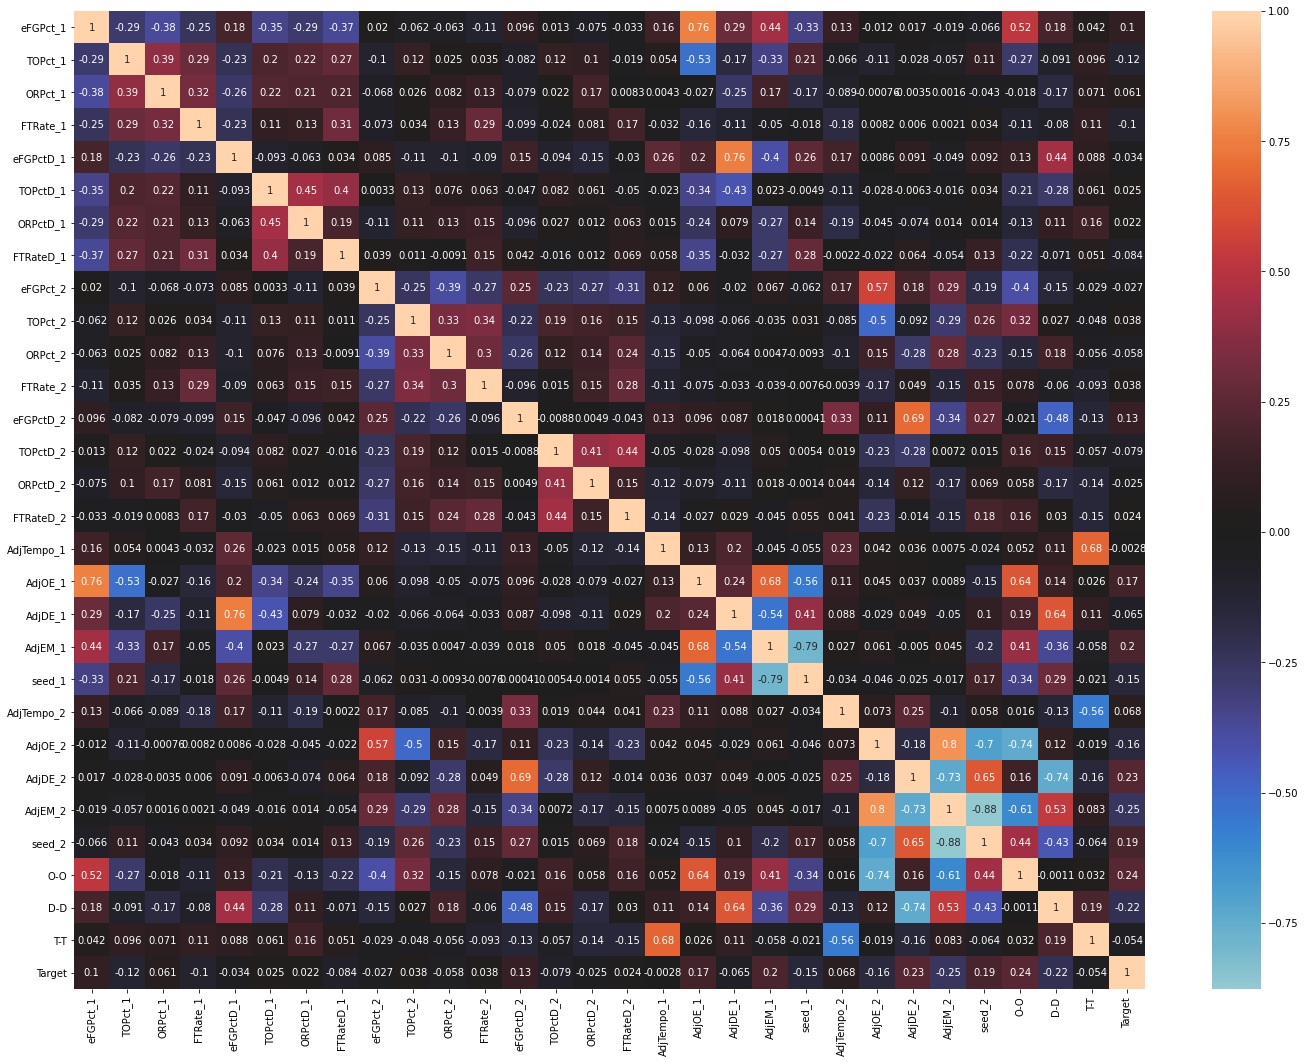

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#correlation heatmap for features
plt.figure(figsize = (24,18))
sns.heatmap(vis_df.corr(), annot=True, center=0)

In [73]:
<img src = 'https://github.com/eliaskalomiris/March-Madness/blob/master/heatmap.png', width=200, height=200>

SyntaxError: ignored

Shown above, we used a correlation heatmap to find the relationships between our features and between features and the target. The plot shows that the highest correlation was between the worse seeded team and its adjusted efficiency (AdjEM _2) at -0.88. This was actually one of the relationships our questions were aimed at exploring. The better seeded team also had a strong correlation between these two features at -0.79. There are many other strong correlations between features, showing that many are likely related. One other feature relationship that stood out was the strong correlation between a team's field goal percentage defense (eFGPctD and defensive adjusted efficiency (AdjDE). This had a correlation coefficient of .76 for the better seeded team and .69 for the lower seeded team. This shows the importance of holding opposing team's to lower shooting percentage in order to have an efficient defense.

The target variable was not strongly correlated with any of our features. This may be an issue for our modeling since none of our features are great predictors on their own. The highest correlated feature with the target outcome of game winner was the adjusted efficiency of the worse seeded team (AdjEM _2). This had a value of -0.25. The team seeds were close to the best correlation at -0.15 for the better seeded team and 0.19 for the worse seed. These may be helpful in our models, but aren't very strong predictors on their own. Finally, it is promising that two of our created features, the difference in the teams' offensive efficencies (O-O) and the difference in the teams' defensive efficencies (D-D) were both close to the most correlated at 0.24 and -0.22 respectively. This shows that offensive and defensive statistics may both be helpful in predicting the outcome.

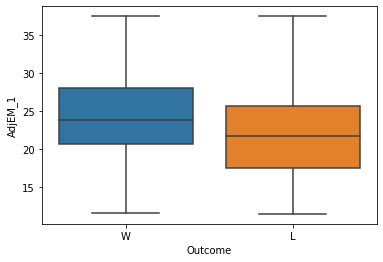

In [0]:
sns.boxplot(x="Outcome", y="AdjEM_1", data=vis_df)

A boxplot of the adjusted efficencies for the better seeded team when the better seeded team wins or loses is shown above. There is a slight increase in the value when the better seeded team wins.

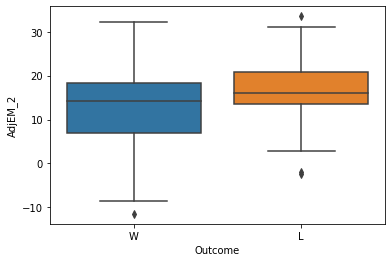

In [0]:
sns.boxplot(x="Outcome", y="AdjEM_2", data=vis_df)

A boxplot of the adjusted efficencies for the worse seeded team when the better seeded team wins or loses is shown above. There is an increase in the value when the better seeded team loses this time. This makes sense, because the first boxplot shows when the better seeded team is more efficient, then it is more likely to win anad when the worse seeded team is more efficient, then the better seeded team is more likely to lose.

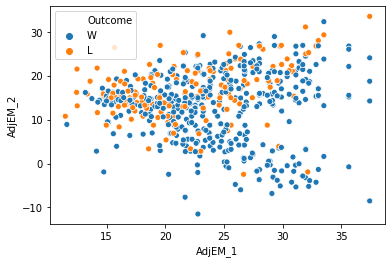

In [0]:
sns.scatterplot(x='AdjEM_1', y='AdjEM_2', hue='Outcome', data=vis_df)

A scatterplot of the better seeded team's efficiency (AdjEM_1) against the worse seeded team's efficiency (AdjEM_2) is displayed above. The hue corresponds to whether the better seeded team won or lost the game. When the better seeded team has a high efficiency and the worse seeded team has a low efficiency (bottom right quadrant of the graph), it is clear the better seeded team usually wins. This makes sense because the efficiency difference is likely large and one team being incredibly more efficient would likely lead to a win.

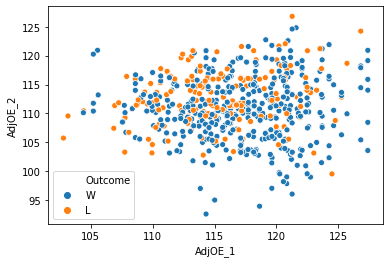

In [0]:
sns.scatterplot(x='AdjOE_1', y='AdjOE_2', hue='Outcome', data=vis_df)

A similar scatterplot for offensive efficiency shows a similar result. Better seeded teams with high offensive efficiency playing against worse seeded teams with low efficiency usually leads to a win for the better seeded team. Again, notice all the blue dots in the bottom right corner.

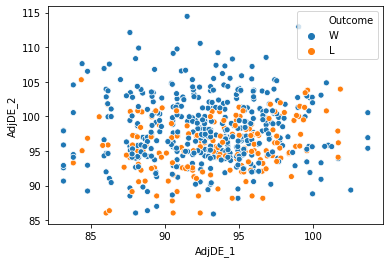

In [0]:
sns.scatterplot(x='AdjDE_1', y='AdjDE_2', hue='Outcome', data=vis_df)

A scatterplot of team defensive efficiencies leads to a different and interesting result. This time, the entire top section of the graph was a win for the better seeded team. This indicates a high value (above ~105) for defensive efficiency for the worse seeded team almost always results in a win for the better seeded team. This makes sense since a lower value of defensive efficiency actually means the team is more efficient on defense. 

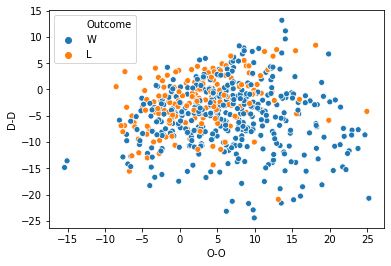

In [0]:
sns.scatterplot(x='O-O', y='D-D', hue='Outcome', data=vis_df)

A scatterplot on the difference in the teams' offensive efficencies vs. the difference in the teams' defensive efficiences is shown above. An advantage for the better seeded team in offensive efficiency is a larger value while an advantage for the better seeded team in defensive efficiency is a smaller value. When the better seeded team has the advantage in both the offensive and defensive categories (bottom right quadrant of the graph), then the better seeded team usually wins. This is consistent with the result you would expect since a team more efficient on offense and defense should be more likely to win.

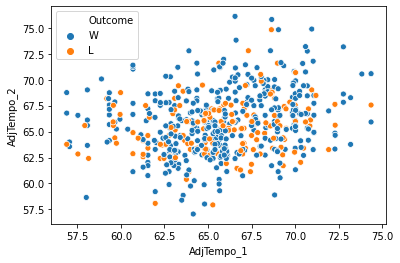

In [0]:
sns.scatterplot(x='AdjTempo_1', y='AdjTempo_2', hue='Outcome', data=vis_df)

A scatterplot of the team tempos against each other revealed no strong trends. Tempo is the speed at which teams play at, so a higher value indicates a team has, on average, more offensive possessions a game. High tempos (above ~70) for the worse seeded team seems to possbily have a trend of the better seeded team winning, but low tempos (below ~60) also may have a trend of the better seeded team winning. Therefore, an average tempo for the worse seede team may be beneficial.

### 3.3. Model Construction
* If you proposed hypotheses, conduct your hypothesis tests
* For your machine learning question(s), split data into training, validation, and testing sets (or use cross-validation)
* Apply machine learning algorithms (apply at least three algorithms)
* Train your algorithms

In [0]:
#imports used for preprocessing and ml
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# dictionary of machine learning algorithms to fit data to
estimators = {"k-Nearest Neighbor":KNeighborsClassifier(),
             "Support Vector Machine": SVC(max_iter = 1000000),
             "Gaussian Naive Bayes": GaussianNB(),
             "Random Forest": RandomForestClassifier(),
             "Logistic Regression": LogisticRegression()}




**Hypothesis Testing**

We want to run hypothesis tests to see if the correlations in our data are significant. 

In [0]:
import scipy.stats as scipy
print("Hypothesis Testing Results\n")

x1 = vis_df["AdjEM_1"].array
y1 = vis_df["seed_1"].array
res1 = scipy.pearsonr(x1, y1)
print("Pearson's R for team 1's AdjEM and Team 1's seed: " + str(res1[0]))
print("P-value for team 1's AdjEM to Team 1's seed: " + str(res1[1]) + "\n")

x1 = vis_df["AdjEM_2"].array
y1 = vis_df["seed_2"].array
res1 = scipy.pearsonr(x1, y1)
print("Pearson's R for team 2's AdjEM and Team 2's seed: " + str(res1[0]))
print("P-value for team 2's AdjEM to Team 2's seed: " + str(res1[1]) + "\n")

x1 = vis_df["AdjEM_1"].array
y1 = vis_df["Target"].array
res1 = scipy.pearsonr(x1, y1)
print("Pearson's R for team 1's AdjEM and Outcome: " + str(res1[0]))
print("P-value for team 1's AdjEM to Outcome: " + str(res1[1]) + "\n")

x1 = vis_df["AdjEM_2"].array
y1 = vis_df["Target"].array
res1 = scipy.pearsonr(x1, y1)
print("Pearson's R for team 2's AdjEM and Outcome: " + str(res1[0]))
print("P-value for team 2's AdjEM to Outcome: " + str(res1[1]) + "\n")

x1 = vis_df["AdjTempo_1"].array
y1 = vis_df["Target"].array
res1 = scipy.pearsonr(x1, y1)
print("Pearson's R for team 1's AdjTempo and Outcome: " + str(res1[0]))
print("P-value for team 1's AdjTempo to Outcome: " + str(res1[1]) + "\n")

x1 = vis_df["AdjTempo_2"].array
y1 = vis_df["Target"].array
res1 = scipy.pearsonr(x1, y1)
print("Pearson's R for team 2's AdjTempo and Outcome: " + str(res1[0]))
print("P-value for team 2's AdjTempo to Outcome: " + str(res1[1]) + "\n")

Hypothesis Testing Results

Pearson's R for team 1's AdjEM and Team 1's seed: -0.7915183091992666
P-value for team 1's AdjEM to Team 1's seed: 6.2877927379514e-123

Pearson's R for team 2's AdjEM and Team 2's seed: -0.8770837918330208
P-value for team 2's AdjEM to Team 2's seed: 4.53078135166726e-182

Pearson's R for team 1's AdjEM and Outcome: 0.19980392835139427
P-value for team 1's AdjEM to Outcome: 1.6216994626654706e-06

Pearson's R for team 2's AdjEM and Outcome: -0.2509462615717218
P-value for team 2's AdjEM to Outcome: 1.3653518843143058e-09

Pearson's R for team 1's AdjTempo and Outcome: -0.002817253323519315
P-value for team 1's AdjTempo to Outcome: 0.9466327682708169

Pearson's R for team 2's AdjTempo and Outcome: 0.06789350433990735
P-value for team 2's AdjTempo to Outcome: 0.10631933740051472



In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_features = sc.fit_transform(features)

We scaled our features using StandardScaler so our variables would be standardized around a mean of 1 and a standard deviation of 1.

In [0]:
# Run models using percentage split approach

def classifiers_percentage_split():
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state = 3000)
    for key, value in estimators.items():
        value.fit(X_train, y_train)    
        print(key,":\n\tPrediction accuracy on the training data:", f"{value.score(X_train, y_train):.2%}\n",
              "\tPrediction accuracy on the test data:", f"{value.score(X_test, y_test):.2%}\n")

classifiers_percentage_split()

k-Nearest Neighbor :
	Prediction accuracy on the training data: 77.65%
 	Prediction accuracy on the test data: 67.61%

Support Vector Machine :
	Prediction accuracy on the training data: 80.47%
 	Prediction accuracy on the test data: 73.94%

Gaussian Naive Bayes :
	Prediction accuracy on the training data: 66.35%
 	Prediction accuracy on the test data: 66.90%

Random Forest :
	Prediction accuracy on the training data: 100.00%
 	Prediction accuracy on the test data: 71.13%

Logistic Regression :
	Prediction accuracy on the training data: 73.65%
 	Prediction accuracy on the test data: 73.24%



Our initial results using default parameters and percentage split revealed that the random forest algorithm worked the best with support vector machine and logistic regression working comprably well and Gaussian Naive Bayes and K-nearest Neighbors performing considerably worse.

In [0]:
# run models using cross validation approach
def classifiers_cross_validation():
    kfold = KFold(n_splits = 10, random_state = 3000, shuffle = True)
    for key, value in estimators.items():
        scores = cross_val_score(estimator = value, X = scaled_features, y = target, cv = kfold)
        print(key,":\n\t", f'mean accuracy:{scores.mean():.2%}, standard deviation:{scores.std():.2%}\n')

classifiers_cross_validation()

k-Nearest Neighbor :
	 mean accuracy:67.38%, standard deviation:6.97%

Support Vector Machine :
	 mean accuracy:71.27%, standard deviation:5.02%

Gaussian Naive Bayes :
	 mean accuracy:63.49%, standard deviation:7.12%

Random Forest :
	 mean accuracy:70.20%, standard deviation:7.06%

Logistic Regression :
	 mean accuracy:71.08%, standard deviation:5.85%



Next, we tested the algorithms using cross validation and default hyperparameters. In this iteration, logistic regression and support vector machine appear to be the most accurate algorithms while random forest performs worse and Gaussian Naive Bayes and k-nearest neighbor are still not optimal algorithms for our task. 

### 3.4. Model Evaluation
* Evaluate the performance of your algorithms on appropriate evaluation metrics, using your validation set
* Interpret your results from multiple models (and hypothesis tests, if any)

Based on results of percentage split and cross validation testing, Support Vector Machines has shown highest prediction accuracy, with a maximum accuracy of 73.24%. This is better than the tournament seed prediction rate of 70.5% but likely could be improved. Logisic Regression has shown to be as or more accurate as comparable classification models.


Hypothesis testing showed significant negative correlation between a team's seed and winning probabilty. Additionally, AdjEm (adjusted efficiency) shows a small, positive correlation for team1 and an similarly small, negative correlation for team2. The AdjTempo (adjusted tempo) feature has an insignificant correlation. This is supported by the seemingly random scatterplot of AdjTempo shown in 3.2.

### 3.5. Model Optimization
* Tune your models using appropriate hyperparameters
* Explain why you are doing this (e.g., to avoid overfitting, etc.)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
# define models with the hyperparameters that we want to try
grid_estimators = {
    'k-Nearest Neighbor': {
        'model': KNeighborsClassifier,
        'param_grid': {'n_neighbors': [2, 3, 5, 7, 10]}
    },
    'Support Vector Machine': {
        'model': SVC,
        'param_grid': {
            'C': [0.001, 0.01, 0.1, 1, 10],
            'gamma' : [0.001, 0.01, 0.1, 1],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'Gaussian Naive Bayes': {
        'model': GaussianNB,
        'param_grid': {}
    },
    'Random Forest': {
        'model': RandomForestClassifier,
        'param_grid': {
             "max_depth":[1, 10, 100],
             "min_samples_split": [2, 10, 100]
        }
    }
}

In [0]:
def classifiers_hyperparameter_tuning():
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state = 3000)
    kfold = KFold(n_splits = 10, random_state = 3000, shuffle = True)
    for estimator_name, estimator_info in grid_estimators.items():
        grid_search = GridSearchCV(estimator_info['model'](), estimator_info['param_grid'])
        grid_search.fit(X= X_train, y = y_train)
        best_params = grid_search.best_params_   
        original_scores = cross_val_score(estimator=estimator_info['model'](), X=X_train, y=y_train, cv=kfold)
        new_model = estimator_info['model'](**best_params)
        improved_scores = cross_val_score(estimator=new_model, X=X_train, y=y_train, cv=kfold)
        print(estimator_name)
        print('\tOptimized Hyperparameters:', best_params)
        print('\n\tOriginal Scores:')
        print("\t\t" + f'mean accuracy={original_scores.mean():.2%}, ' + f'standard deviation={original_scores.std():.2%}')
        print('\n\tImproved Scores:')
        print("\t\t" + f'mean accuracy={improved_scores.mean():.2%}, ' + f'standard deviation={improved_scores.std():.2%}\n')
        print('\t' + f'Test set score = {grid_search.score(X_test, y_test):.2%}')

In [0]:
classifiers_hyperparameter_tuning()

k-Nearest Neighbor
	Optimized Hyperparameters: {'n_neighbors': 10}

	Original Scores:
		mean accuracy=64.26%, standard deviation=7.06%

	Improved Scores:
		mean accuracy=68.50%, standard deviation=8.13%

	Test set score = 66.20%
Support Vector Machine
	Optimized Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

	Original Scores:
		mean accuracy=70.14%, standard deviation=6.56%

	Improved Scores:
		mean accuracy=70.85%, standard deviation=6.66%

	Test set score = 71.83%
Gaussian Naive Bayes
	Optimized Hyperparameters: {}

	Original Scores:
		mean accuracy=62.39%, standard deviation=8.34%

	Improved Scores:
		mean accuracy=62.39%, standard deviation=8.34%

	Test set score = 66.90%
Random Forest
	Optimized Hyperparameters: {'max_depth': 100, 'min_samples_split': 10}

	Original Scores:
		mean accuracy=67.33%, standard deviation=6.43%

	Improved Scores:
		mean accuracy=68.75%, standard deviation=5.87%

	Test set score = 73.24%


Next, we perfromed Iterative Feature Selection in an attempt to avoid overfitting.

In [0]:
#Iterative Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state = 3000)
select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 11)
select.fit(X_train, y_train)
#transform training and testing sets so only the selected features remain
X_train_selected_logreg = select.transform(X_train)
X_test_selected_logreg = select.transform(X_test)

logreg = LogisticRegression().fit(X=X_train_selected_linreg, y=y_train)

#r2_score(y_train, model.predict(X_train))
#r2_score(y_test, model.predict(X_test))

print("Logistic Regression")
print("R-squared value for training set: ", r2_score(y_train, logreg.predict(X_train_selected_logreg)))
print("R-squared value for testing set: ", r2_score(y_test, logreg.predict(X_test_selected_logreg)))
print("\nPrediction accuracy on the training data:", f"{logreg.score(X_train_selected_logreg, y_train):.2%}\nPrediction accuracy on the test data:", 
      f"{logreg.score(X_test_selected_logreg, y_test):.2%}\n")

Logistic Regression
R-squared value for training set:  -0.38457958423828753
R-squared value for testing set:  -0.4620334620334621

Prediction accuracy on the training data: 70.35%
Prediction accuracy on the test data: 71.83%



In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state = 3000)
select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 18)
select.fit(X_train, y_train)
#transform training and testing sets so only the selected features remain
X_train_selected_svc = select.transform(X_train)
X_test_selected_svc = select.transform(X_test)

svcmodel = SVC(kernel = 'rbf', gamma = 0.1, C = 1, max_iter = 1000000).fit(X=X_train_selected_svc, y=y_train)


print("Support Vector Machine:")
print("R-squared value for training set: ", r2_score(y_train, svcmodel.predict(X_train_selected_svc)))
print("R-squared value for testing set: ", r2_score(y_test, svcmodel.predict(X_test_selected_svc)))
print("\nPrediction accuracy on the training data:", 
      f"{svcmodel.score(X_train_selected_svc, y_train):.2%}\nPrediction accuracy on the test data:", 
      f"{svcmodel.score(X_test_selected_svc, y_test):.2%}\n")

Support Vector Machine:
R-squared value for training set:  0.4505636570482986
R-squared value for testing set:  -0.2792792792792793

Prediction accuracy on the training data: 88.24%
Prediction accuracy on the test data: 75.35%



In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state = 3000)
select = RFE(DecisionTreeRegressor(random_state = 3000), n_features_to_select = 18)
select.fit(X_train, y_train)
#transform training and testing sets so only the selected features remain
X_train_selected_svc = select.transform(X_train)
X_test_selected_svc = select.transform(X_test)

forestmodel = RandomForestClassifier(max_depth = 5, min_samples_split = 10).fit(X=X_train_selected_svc, y=y_train)


print("Random Forest:")
print("R-squared value for training set: ", r2_score(y_train, forestmodel.predict(X_train_selected_svc)))
print("R-squared value for testing set: ", r2_score(y_test, forestmodel.predict(X_test_selected_svc)))
print("\nPrediction accuracy on the training data:", 
      f"{forestmodel.score(X_train_selected_svc, y_train):.2%}\nPrediction accuracy on the test data:", 
      f"{forestmodel.score(X_test_selected_svc, y_test):.2%}\n")

Random Forest:
R-squared value for training set:  0.30771020788085623
R-squared value for testing set:  -0.3158301158301158

Prediction accuracy on the training data: 85.18%
Prediction accuracy on the test data: 74.65%



### 3.6. Model Testing
* Test your tuned algorithms using your testing set

In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state = 3000)
kfold = KFold(n_splits = 10, random_state = 3000, shuffle = True)
print('Grid Search Cross Validation Test set scores:')
for estimator_name, estimator_info in grid_estimators.items():
  grid_search = GridSearchCV(estimator_info['model'](), estimator_info['param_grid'])
  grid_search.fit(X= X_train, y = y_train)
  best_params = grid_search.best_params_   
  original_scores = cross_val_score(estimator=estimator_info['model'](), X=X_train, y=y_train, cv=kfold)
  new_model = estimator_info['model'](**best_params)
  improved_scores = cross_val_score(estimator=new_model, X=X_train, y=y_train, cv=kfold)
  print(estimator_name)
  print('\t' + f'Test set score = {grid_search.score(X_test, y_test):.2%}')

print("\nFeature Reduction Logistic Regression:")
print("\tR-squared value for testing set: ", r2_score(y_test, linreg.predict(X_test_selected_linreg)))
print("\tPrediction accuracy on the test data:", f"{linreg.score(X_test_selected_linreg, y_test):.2%}\n")

print("\nFeature Reduction Support Vector Machine with Optimized Hyperparameters:")
print("\tR-squared value for testing set: ", r2_score(y_test, svcmodel.predict(X_test_selected_svc)))
print("\tPrediction accuracy on the test data:", 
      f"{svcmodel.score(X_test_selected_svc, y_test):.2%}\n")



Grid Search Cross Validation Test set scores:
k-Nearest Neighbor
	Test set score = 66.20%
Support Vector Machine
	Test set score = 71.83%
Gaussian Naive Bayes
	Test set score = 66.90%
Random Forest
	Test set score = 73.24%

Feature Reduction Logistic Regression:
	R-squared value for testing set:  0.08448760572536307
	Prediction accuracy on the test data: 8.45%


Feature Reduction Support Vector Machine with Optimized Hyperparameters:
	R-squared value for testing set:  -0.2792792792792793
	Prediction accuracy on the test data: 75.35%



<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
* Provide a summary of the steps you took to analyze your data and test your predictive model
* Intepret your findings from 3.4., 3.5, and 3.6
    * Which algorithms did you compare?
    * Which algorithm(s) revealed best performance?
    * Which algorithm(s) should be used for your predictive model?
* If you tested hypotheses, interpret the results. What does it mean to have significant/non-significant differences with regards to your data?


* End this section with a conclusion paragraph containing some pointers for future work 
    *(e.g., get more data, perform another analysis, etc.)

In order to analyze the data and predict which teams would win NCAA Tournament games, we had to merge data from several datasets and sources. This required cleaning of the team names and other columns as well as removing unnecessary columns. We then separated the dataset into features and a binary target of W/L which specified whether the better seeded (lower seed value) team in the matchup won or lost the game. Next, we split the data into training and testing sets to prepare for modeling. Finally, we compared the performance of the following algorithms:

*	k-Nearest Neighbor
*	Support Vector Machine
*	Gaussian Naive Bayes
*	Random Forests
*	Logistic Regression

We evaluated the initial results of the models and of several hypothesis tests. Then, we tuned the hyperparameters of the models using a grid search as well as used feature selection techniques before using SVM, which was our best performing model.

The Support Vector Machine and Logistic Regression models had the best performance initially through a percentage split approach at 73.94% and 73.24% prediction accuracy on the test sets respectively. These two models were also the best with a cross validation approach, but the accuracy dropped to ~71% for each. These models were better than the 70.5% accuracy by just picking the highest seed each time, but could be improved. So, model optimization was done by tuning hyperparameters through a grid search. This increased the prediction accuracy of the Random Forest model to 73.24%, but the Support Vector Machine model was not improved. Therefore, we attempted iterative feature selection on the three best models, Support Vector Machine, Random Forest, and Logistic Regression. By limiting the number of selected features to 18 from the original 29, the prediction accuracy was improved for the Support Vector Machine and Random Forest models.The Support Vector Machine and Logistic Regression models had the best performance initially through a percentage split approach at 73.94% and 73.24% prediction accuracy on the test sets respectively. These two models were also the best with a cross validation approach, but the accuracy dropped to ~71% for each. These models were better than the 70.5% accuracy by just picking the highest seed each time, but could be improved. So, model optimization was done by tuning hyperparameters through a grid search. This increased the prediction accuracy of the Random Forest model to 73.24%, but the Support Vector Machine model was not improved. Therefore, we attempted iterative feature selection on the three best models, Support Vector Machine, Random Forest, and Logistic Regression. By limiting the number of selected features to 18 from the original 29, the prediction accuracy was improved for the Support Vector Machine and Random Forest models.

Final results showed accuracy best predicted by a Support Vector Machine model with accuracy of %%% and an R-squared value of %%%. The Random Forest model had similarly high results with accuracy of %%% and R-squared of %%%. With this said, both models appeared to be slightly overfitted and had a significant higher prediction accuracy on the training data compared to the testing data. K-Nearest Neighbor and Gaussian Naive Bayes models were less effective with test scores of %%% and %%% even after tuning hyperparameters.  

We were able to get decent accuracy in predicting NCAA Tournament game outcomes as shown above, but there is space to improve. None of our features were strongly correlated with the target variable, as adjusted efficiency for the worse seeded team was highest at -0.25. This value is significantly correlated with the outcome of the games, but we would like to use features that have stronger R-squared correlations to the target and closer to -1 or 1. By using data from other sources, we may find new basketball team statistics that are more strongly correlated with the game winner. These may be aspects of a basketball team such as the number of players on the team that average more than 10 points a game, the players’ average height on the team, or overall team 3 point percentage. We also may be able to engineer more new features through making relationships between features on each of the teams playing each other. An example of this would be taking the difference between the two teams’ field goal percentages so we can use the advantage in field goal percentage that one team has over another as a feature. We believe by identifying or creating better features, we could cut out some of the more irrelevant ones and create more accurate models by using more strongly correlated features and reducing overfitting.


<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS
* Section 1: Team effort from prior submissions with slight editing
* Section 2: Team effort from prior submissions with slight editing
* Section 3.1-3.2: Nick
* Section 3.3-3.6: Elias and Steve
* Section 4: Team effort 